### 3. Feladatsor

Lineáris (algebrai) egyenletrendszerek <sup>LAER</sup> iteratív megoldása

#### Emlék (Fixpont-tétel):

Legyen $X$ Banach-tér (elég: teljes, metrikus), $f: X \to X$ kontrakció, azaz $\exists c \in [0, 1)$, amire

$$
  \forall x,y \in X \quad \| f(x) - f(y) \|  \leq c\| x - y \|. 
$$
Ekkor $f$-nek egyértelmű fixpontja van, azaz $\exists! x^* \in X\colon f(x^*) = x^*$, továbbá tetszőleges $x_0 \in X$ pontból indítva az $x_{n+1} = f(x_n)$ iterációt, a határérték $x^*$ lesz.


Például: $X = \mathbb{R}, f(x) = \frac12 x$ esetén $$x_n = 2^{-n}x_0 \to x^* = 0, \quad f(0) = 0.$$

#### 1. feladat

Írjunk függvényt, ami kiszámolja az egyszerű iteráció $n.$ iteráltját.

In [1]:
function x = fixpontit(f, x0, max_it)
    x = x0;
    for i=1:max_it
        x = f(x); 
    end
end

fixpontit(@(x)(x/2), 100, 10), 100/2^10

ans =  0.097656
ans =  0.097656


Használjuk ezt az $$ Ax^*-b = 0$$ egyenlet megoldására, azaz keressünk olyan $f$ kontrakciót, aminek $x^*$ fixpontja. 

A két oldalt negálva, majd $x^*$-ot hozzájuk adva már is egy lehetséges alakhoz jutunk:
$$
\begin{align*}
x^* - (Ax^* - b) = x^*
\end{align*}
$$

Azonban $f(x) = x^* - (Ax^* - b) = (I-A)x^* + b$ tipikusan nem kontrakció, így az
$$
 x_{k+1}  = f(x_k) = (I-A)x_k + b
$$
iteráció konvergenciája nem garantált.

Persze ha $\|I-A\| < 1$ valamilyen indukált mátrixnormában, akkor
$$
\| f(x) - f(y) \|  = \| (I - A)(x - y)\| \leq \|I-A\| \|x - y\|,
$$
így ebben az esetben az iteráció kezdőponttól függetlenül konvergálni fog $x^*$-hoz. 

A továbbiakban az $M$ iterációs mátrix (fent $I-A$) szimmetrikus, ezért kényelmes a $2-$es normát használni, ami ebben az esetben $$\| M \|_2 = \max_i(|\lambda_i(M)|) =: \rho(M) = \max(|\lambda_{\min}(M)|, |\lambda_{\max}(M)|).$$

#### Richardson-iterációt

Alapötlet:
$$
\begin{align*}
     Ax &= b \\
     0 &= - \omega (Ax - b)  \\
     x &= x - \omega (Ax - b) \\
       &= (I-\omega A)x + b
\end{align*}
$$

azaz, a megfelelő függvény és iteráció:
$$f(x) = (I-\omega A)x + b, \\ x_{k+1} = (I-\omega A)x_k + b.$$


Ebben az esetben tehát a konvergencia az $\|I-\omega A\|_2$ értéken fog múlni, ami nem más, mint

$$
\rho(I - \omega A) = \max_i |1 - \omega \lambda_i(A)|.
$$

Az optimális $\omega$ tehát előáll, mint a
$$
 \operatorname{argmin}_{\omega} \max_i |1 - \omega \lambda_i(A)|
$$
feladat megoldása.

Tekintsük néhány $a > 0$ esetén az $$ \omega \mapsto |1 - a\omega| $$ függvényt.

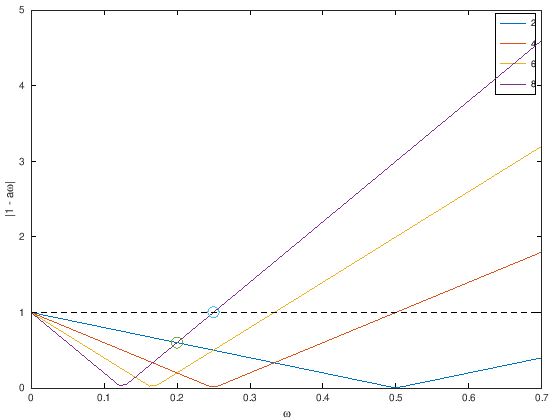

In [2]:
for a=[2,4,6,8]
    plot(linspace(0,.7,70), abs(1 - a*linspace(0,.7,70))); hold on
end
scatter([.2], [.6], [1000], 'o'); hold on
scatter([.25], [1], [1000], 'o'); hold on
line ([0 .7], [1 1], "linestyle", "--", "color", "k");
legend(arrayfun(@int2str, [2,4,6,8], "UniformOutput", 0))
xlabel("\\omega")
ylabel("\|1 - a\\omega\|")

Azaz ha $A > 0$, akkor a két fontos metszéspontot rendre az
$$
|1 - \lambda_\max\omega| = 1, \quad |1 - \lambda_\max \omega| = |1 - \lambda_\min \omega|
$$
egyenletek határozzák meg. Következik, hogy
$$0 < \omega < \frac{2}{{\lambda_\max(A)}}$$ megfelelő, $$\omega_{opt} = \frac{2}{\lambda_{\min}(A) + \lambda_{\max}(A)}$$ optimális.

#### Rövid reklámszünet: leállási feltételek

Meddig érdemes folytatni az iterációt? Ötletek?

1. Tegyünk max. $n$ lépést: *MAXIT*.

2. Ha $\| x_{k+1} - x_k \|$ kicsi, akkor valószínűleg közel járhatunk a megoldáshoz: *ATOL*.

  3. Ha $x_k$ minden tagja nagyon kicsi vagy nagyon nagy, akkor *ATOL* önmagában nem elég jó, ezért tekintsük a $\frac{\| x_{k+1} - x_k \|}{\|x_k\|}$ mennyiséget: *RTOL*.

#### 2. feladat
Írjunk Jacobi-iterációt. Kombináljuk kedvünkre a különböző leállási feltételeket, ezekhez válasszunk nekünk szimpatikus vektornormát.. például választhatjuk a
$$
\|x\|_{RFNWRMSE} = \sqrt{\sum_j \frac{1}{F_j} x_j^2}
$$
formulával adott *reciprocal fibonacci number weighted root mean square error* normát is, ahol $F_j$ a $j.$ Fibonacci-szám $(F_0 = F_1 = 1)$.

#### A Jacobi, Gauss-Seidel, S<sub>ucessive</sub>O<sub>ver</sub>R<sub>elaxation</sub> iterációk

__Tétel:__ Ha $A$ M-mátrix, akkor a Jacobi, GS iterációk és ezek relaxált változatai $\omega\in (0,1)$ mellett tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához.

__Tétel:__ Ha $A$ SZDD, akkor a Jacobi és GS iterációk tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához.

__Tétel:__ Ha $A$ SZPD, akkor a GS iteráció és SOR módszer $\omega\in (0,2)$ iterációk tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához.

In [3]:
A = randi(3,2)

[L, D, U] = {tril(A, -1), diag(diag(A)), triu(A, 1)}{:}

A =

   3   2
   3   2

L =

   0   0
   3   0

D =

Diagonal Matrix

   3   0
   0   2

U =

   0   2
   0   0



#### 3. feladat
Írjunk Jacobi-iterációt. 

Alapötlet:
$$
\begin{align*}
     Ax &= b \\
     (L+D+U)x &= b  \\
Dx &= ( b - (L+U)x) \\ 
x &= D^{-1}(b - (L+U)x)
\end{align*}
$$
azaz, a megfelelő függvény és iteráció:
$$f(x) = D^{-1}\left(-(L+U)x + b\right), \\ x_{k+1} = D^{-1}\left(-(L+U)x_k + b\right).$$

#### 4. feladat
Írjunk Gauss-Seidel-iterációt. 

Alapötlet:
$$
\begin{align*}
     Ax &= b \\
     (L+D+U)x &= b  \\
(L+D)x &= ( b - Ux) \\ 
x &= (L+D)^{-1}(b - Ux)
\end{align*}
$$
azaz, a megfelelő függvény és iteráció:
$$f(x) = (L+D)^{-1}\left(-Ux + b\right) \\ x_{k+1} = (L+D)^{-1}\left(-Ux_k + b\right).$$

#### 5. feladat
Írjunk SOR iterációt. 

Alapötlet:
$$
\begin{align*}
     Ax &= b \\
     \omega (L+D+U)x &= \omega b  \\
(D + \omega L)x &= \omega b - (\omega U + (\omega - 1)D)x \\ 
x &= (D + \omega L)^{-1}(\omega b - (\omega U + (\omega - 1)D)x)
\end{align*}
$$
azaz, a megfelelő függvény és iteráció:
$$f(x) = (D + \omega L)^{-1}(\omega b - (\omega U + (\omega - 1)D)x), \\ x_{k+1} = (D + \omega L)^{-1}(\omega b - (\omega U + (\omega - 1)D)x_k). $$